## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata_df, study_results_df, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
orig_no_mice = len(pd.unique(combined_mouse_df['Mouse ID']))
orig_no_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
count_series = combined_mouse_df.groupby(['Mouse ID','Timepoint']).size()
count_df = count_series.to_frame(name = 'size').reset_index()
sorted_count_df = count_df.sort_values('size', ascending=False)
dupicates_count_mouse_df = sorted_count_df.loc[sorted_count_df['size'] > 1]
dupicates_count_mouse_df

,Mouse ID,Timepoint,size
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_combined_mouse_df = combined_mouse_df.loc[combined_mouse_df['Mouse ID'] == 'g989']
duplicates_combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_mouse_df = combined_mouse_df[combined_mouse_df['Mouse ID'] != 'g989']
cleaned_combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
no_mice = len(pd.unique(cleaned_combined_mouse_df['Mouse ID']))
no_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting tregimen_grouped = cleaned_combined_mouse_df.groupby(["Drug Regimen"])

grouped_mouse_data = cleaned_combined_mouse_df.groupby('Drug Regimen')
tumor_volume_mean = grouped_mouse_data['Tumor Volume (mm3)'].mean()
tumor_volume_median = grouped_mouse_data['Tumor Volume (mm3)'].median()
tumor_volume_variance = grouped_mouse_data['Tumor Volume (mm3)'].var()
tumor_volume_std = grouped_mouse_data['Tumor Volume (mm3)'].std()
tumor_volume_sem = grouped_mouse_data['Tumor Volume (mm3)'].sem()
# tumor_volume_mean.head()
# print(type(tumor_volume_mean))
    #tumor_volume_df = pd.DataFrame({"Mean":[tumor_volume_mean]})
#tumor_volume_df

# Create a dataframe with all of our summary information
summary_statistics_df = pd.DataFrame({"Mean":tumor_volume_mean,
                                "Median":tumor_volume_median,
                                "Variance":tumor_volume_variance,
                                "Standard Deviation":tumor_volume_std,
                                "Standard Error of Measurement":tumor_volume_sem
                                 })
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_statistics_df = cleaned_combined_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([('Mean', 'mean'),
                                                                                                     ("Median",'median'),
                                                                                                     ("Variance",'var'),
                                                                                                     ("Standard Deviation",'sem'),
                                                                                                     ("Standard Error of Measurement",'sem')
                                                                                                    ])
summary_statistics_df


,Mean,Median,Variance,Standard Deviation,Standard Error of Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111,0.573111


## Bar and Pie Charts

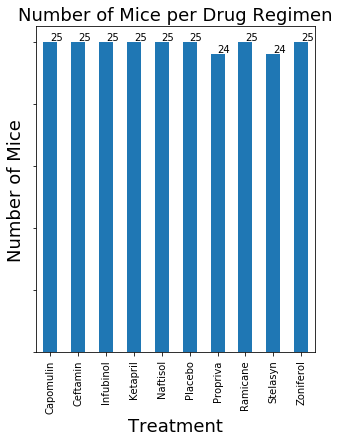

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen").nunique()['Mouse ID']

no_mice_bar = no_mice_data.plot(kind='bar',figsize=(5,6))
no_mice_bar.set_title("Number of Mice per Drug Regimen", fontsize=18)
no_mice_bar.set_xlabel("Treatment", fontsize=18)
no_mice_bar.set_ylabel("Number of Mice", fontsize=18);
no_mice_bar.set_yticklabels([])

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    no_mice_bar.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')




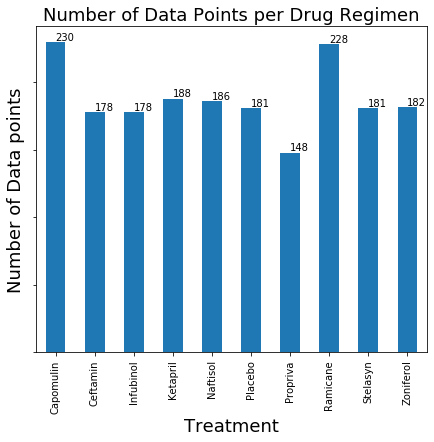

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen")['Timepoint'].count()

no_mice_bar = no_mice_data.plot(kind='bar',figsize=(7,6))
no_mice_bar.set_title("Number of Data Points per Drug Regimen", fontsize=18)
no_mice_bar.set_xlabel("Treatment", fontsize=18)
no_mice_bar.set_ylabel("Number of Data points", fontsize=18);
no_mice_bar.set_yticklabels([])

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    no_mice_bar.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')




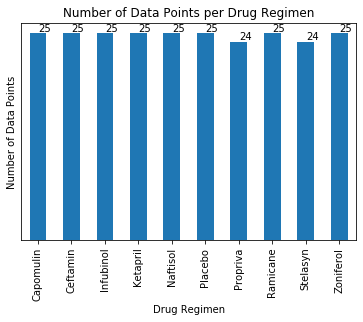

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen").nunique()['Mouse ID']
plt.xdata = no_mice_data.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.yticks([])
plt.title('Number of Data Points per Drug Regimen')

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    plt.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')
plt.show()




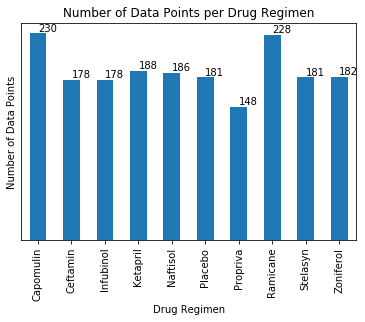

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen")['Timepoint'].count()

plt.xdata = no_mice_data.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.yticks([])
plt.title('Number of Data Points per Drug Regimen')

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    plt.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')
plt.show()

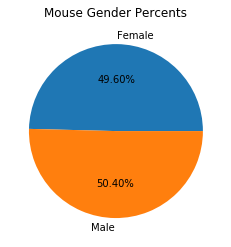

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = cleaned_combined_mouse_df.groupby('Sex').nunique()['Mouse ID']
gender_data.name = ''
gender_data_pie = gender_data.plot(kind='pie',autopct='%.2f%%', title='Mouse Gender Percents',x="Heading")


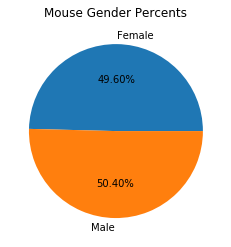

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = cleaned_combined_mouse_df.groupby('Sex').nunique()['Mouse ID']

plt.pie(gender_data,labels=gender_data.index,autopct='%.2f%%')
plt.title('Mouse Gender Percents')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_records_df = cleaned_combined_mouse_df.groupby("Mouse ID").max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_full_data_df = pd.merge(cleaned_combined_mouse_df,last_records_df,how='inner',on=('Mouse ID','Timepoint'))

capomulin_records_df = last_full_data_df.loc[last_full_data_df['Drug Regimen'] == "Capomulin"]
ramicane_records_df = last_full_data_df.loc[last_full_data_df['Drug Regimen'] == "Ramicane"]
infubinol_records_df = last_full_data_df.loc[last_full_data_df['Drug Regimen'] == "Infubinol"]
ceftamin_records_df = last_full_data_df.loc[last_full_data_df['Drug Regimen'] == "Ceftamin"]

capomulin_records_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3
12,y793,Capomulin,Male,17,17,45,31.896238,2
13,r554,Capomulin,Female,8,17,45,32.377357,3
14,m957,Capomulin,Female,3,19,45,33.329098,1
16,t565,Capomulin,Female,20,17,45,34.455298,0
20,i738,Capomulin,Female,23,20,45,37.311846,2


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = last_full_data_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq    

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



    

Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.


In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vols =  last_full_data_df['Tumor Volume (mm3)']
   
# add subset 
capomulin_tumor_vols = capomulin_records_df['Tumor Volume (mm3)']
ramicane_tumor_vols = ramicane_records_df['Tumor Volume (mm3)']
infubinol_tumor_vols = infubinol_records_df['Tumor Volume (mm3)']
ceftamin_tumor_vols = ceftamin_records_df['Tumor Volume (mm3)']
    
    
# Determine outliers using upper and lower bounds
# Capomuline
capomuline_quartiles = capomulin_records_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomuline_lowerq = capomuline_quartiles[0.25]
capomuline_upperq = capomuline_quartiles[0.75]
capomuline_iqr = capomuline_upperq-capomuline_lowerq    

capomuline_lower_bound = capomuline_lowerq - (1.5*capomuline_iqr)
capomuline_upper_bound = capomuline_upperq + (1.5*capomuline_iqr)
print(f"Capomuline_ Values below {capomuline_lower_bound} could be outliers.")
print(f"Capomuline_Values above {capomuline_upper_bound} could be outliers.")



# Ramicane
ramicane_quartiles = ramicane_records_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq    

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Ramicane_ Values below {ramicane_lower_bound} could be outliers.")
print(f"Ramicane_Values above {ramicane_upper_bound} could be outliers.")

# Infubinol
infubinol_quartiles = infubinol_records_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq    

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Infubinol Values below {infubinol_lower_bound} could be outliers.")
print(f"Infubinol Values above {infubinol_upper_bound} could be outliers.")

# Ceftamin
ceftamin_quartiles = ceftamin_records_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq    

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Ceftamin_ Values below {ceftamin_lower_bound} could be outliers.")
print(f"Ceftamin_ Values above {ceftamin_upper_bound} could be outliers.")


Capomuline_ Values below 20.70456164999999 could be outliers.
Capomuline_Values above 51.83201549 could be outliers.
Ramicane_ Values below 17.912664470000003 could be outliers.
Ramicane_Values above 54.30681135 could be outliers.
Infubinol Values below 36.83290494999999 could be outliers.
Infubinol Values above 82.74144559000001 could be outliers.
Ceftamin_ Values below 25.355449580000002 could be outliers.
Ceftamin_ Values above 87.66645829999999 could be outliers.


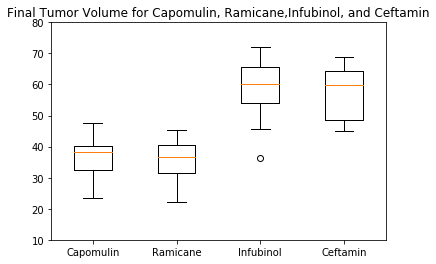

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
box_plot_data=[capomulin_tumor_vols,ramicane_tumor_vols,infubinol_tumor_vols,ceftamin_tumor_vols]
plt.boxplot(box_plot_data,labels=drugs)
plt.title('Final Tumor Volume for Capomulin, Ramicane,Infubinol, and Ceftamin') 
plt.ylim(10, 80)
plt.show()


## Line and Scatter Plots

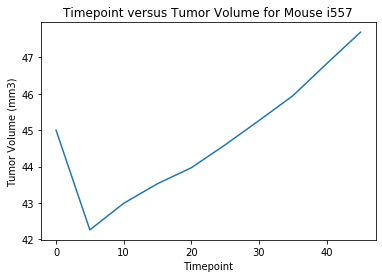

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
chosen_mouse = 'i557'
chosen_mouse_df = cleaned_combined_mouse_df.loc[cleaned_combined_mouse_df['Mouse ID'] == chosen_mouse]
x_axis = chosen_mouse_df['Timepoint']
y_axis = chosen_mouse_df['Tumor Volume (mm3)']

plt.title('Timepoint versus Tumor Volume for Mouse i557')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis)
# plt.xlim(0,50)
# plt.ylim(40,50)
plt.show()

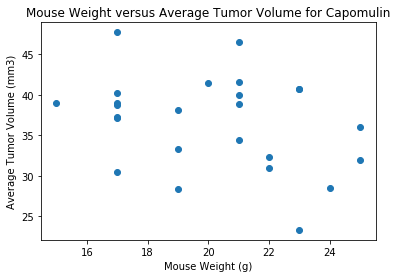

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_axis = capomulin_records_df['Weight (g)']
y_axis = capomulin_records_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis)
plt.title('Mouse Weight versus Average Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The R-Value between Mouse Weights and Average Tumor Volumes is -0.31 for Capomulin Mice.


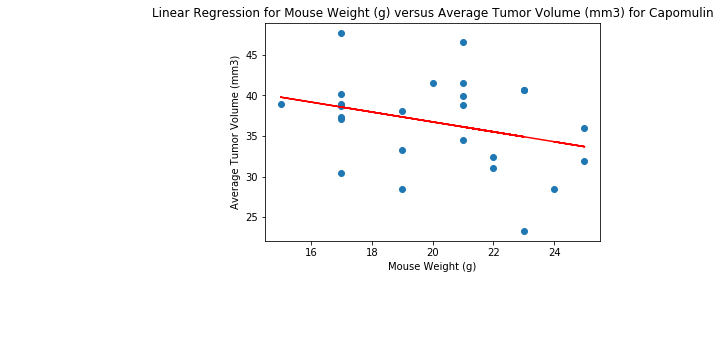

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis = capomulin_records_df['Weight (g)']
y_axis = capomulin_records_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The R-Value between Mouse Weights and Average Tumor Volumes is {round(rvalue,2)} for Capomulin Mice.")


regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression for Mouse Weight (g) versus Average Tumor Volume (mm3) for Capomulin')
plt.show()